### Exercice 2 : l’algorithme de Simon

#### Introduction du problème :

Le problème classique de Simon se pose comme un défi algorithmique intrinsèquement difficile, démontrant qu'il ne peut être résolu de manière efficace par un algorithme classique aléatoire non-exponentiel. L'énoncé du problème implique une fonction inconnue F, représentée comme une boîte noire, avec deux formes possibles:

F(x) = y = x.
F(x) = y, où y peut prendre deux valeurs possibles.

Dans le deuxième cas, la fonction F est caractérisée par une chaîne de bits b. L'élément crucial est que si deux entrées distinctes x1 et x2 produisent la même sortie (f(x1) = f(x2)), alors une relation spécifique, x1 ⊕ x2 = B, est vérifiée, où B est une chaîne de bits préétablie. Le problème consiste à déterminer la chaîne de bits B en effectuant le moins d'appels possibles à la fonction F.

##### Question 1, implémentation de l'oracles de l'algorithme de Simon
Imports : 

In [2]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
import numpy as np

Générateur aléatoire d'oracle de Simon :

11


c:\Users\erraz\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


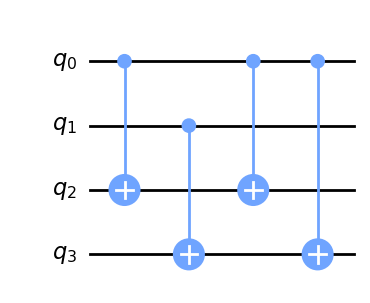

In [3]:

b = np.random.randint(1, 2**n)
b_str = format(b, '0'+str(n)+'b')

oracle = simon_oracle(b_str)
print(b_str)
oracle.draw(output = 'mpl')


##### Oracle forme 

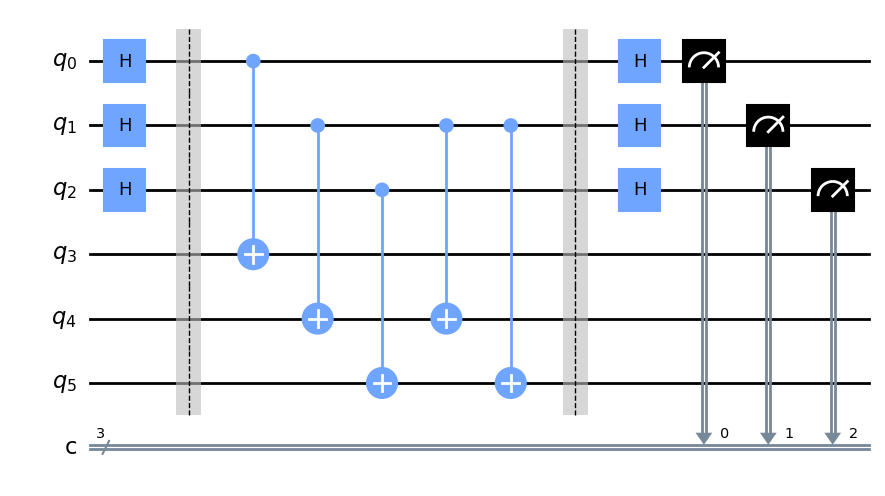

In [4]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit &= simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw("mpl")

Implémentation de l'algorithme de Simon à n qubits

In [5]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram


def simon_algorithm(b):
    n = len(b)
    
    # Create the Simon circuit
    simon_circuit = QuantumCircuit(n*2, n)

    # Apply Hadamard gates before querying the oracle
    simon_circuit.h(range(n))    
    
    # Apply barrier for visual separation
    simon_circuit.barrier()

    simon_circuit &= simon_oracle(b)

    # Apply barrier for visual separation
    simon_circuit.barrier()

    # Apply Hadamard gates to the input register
    simon_circuit.h(range(n))

    # Measure qubits
    simon_circuit.measure(range(n), range(n))
    
    return simon_circuit

# Example usage:


# Simulate the circuit
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()

# Plot the histogram of measurement outcomes
counts = results.get_counts()
plot_histogram(counts)

# Display the dot product results
for z in counts:
    print('{} . {} = {} (mod 2)'.format(b, z, sum(int(x) for x in z) % 2))

110 . 001 = 1 (mod 2)
110 . 110 = 0 (mod 2)
110 . 111 = 1 (mod 2)
110 . 000 = 0 (mod 2)


C:\Users\erraz\AppData\Local\Temp\ipykernel_1896\1630237589.py:37: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


### Simulation de l'algorithme de Simon

les différentes étapes et le résultat de votre implémentation sur le simulateur (aer_simulator) et le vrai ordinateur quantique IBM.

C:\Users\erraz\AppData\Local\Temp\ipykernel_1896\1558142729.py:8: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


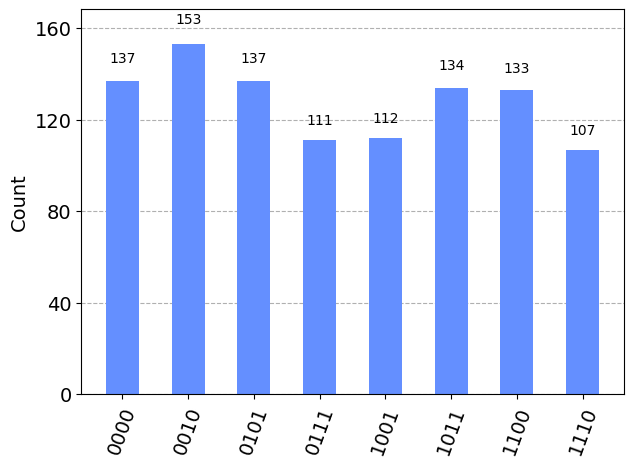

In [6]:
b = '1101'
simon_circuit = simon_algorithm(b)

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Vérification de l'algorithme de Simon

In [7]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

1101.1110 = 0 (mod 2)
1101.0101 = 0 (mod 2)
1101.0010 = 0 (mod 2)
1101.1011 = 0 (mod 2)
1101.0111 = 0 (mod 2)
1101.0000 = 0 (mod 2)
1101.1100 = 0 (mod 2)
1101.1001 = 0 (mod 2)


### Quantum computer IBM

In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and not x.configuration().simulator and x.status().operational==True))
print(provider.backends())

C:\Users\erraz\AppData\Local\Temp\ipykernel_1896\1382123389.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [9]:
from qiskit.tools.monitor import job_monitor


b = '1101'
simon_circuit = simon_algorithm(b)

transpiled_circuit = transpile(simon_circuit, backend, optimization_level=3)
job = backend.run(transpiled_circuit)
job_monitor(job, interval=2)
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Job Status: job is queued (None)

Vérification de l'algorithme de Simon sur un vrai ordinateur quantique IBM

In [ ]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )